# Q-Network
* 실전 문제에서는 앞서 공부하던 Q-Table을 적용할 수가 없음
* 기존 방식은 state, action을 input으로 q-value를 얻었다면 새로운 방식은 state를 input으로 모든 action에 대한 q-value를 output으로 가진다

$ y = r + {\gamma}maxQ(s') $ <p>
$ cost(W) = (\hat{Q} - y)^2  $ <p> $ (\hat{Q} = Ws)$
    
* neural net에서는 Q가 수렴하지 않는다 -> 해결법은 DQN (Deep, Replay, Seperated Network)

In [2]:
import numpy as np
import tensorflow as tf
import gym
import matplotlib.pyplot as plt

def one_hot(x):
    return np.identity(16)[x:x+1]

In [4]:
env = gym.make('FrozenLake-v0')

input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

X = tf.placeholder(shape =[1, input_size], dtype = tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01))

Qpred = tf.matmul(X, W)
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)

loss = tf.reduce_sum(tf.square(Y - Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

dis = 0.99
num_episodes = 2000

rList = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        
        s = env.reset()
        e = 1./((i/50) + 10)
        rAll = 0
        done = False
        local_loss = []
        
        while not done:
            
            Qs = sess.run(Qpred, feed_dict = {X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)
            
            s1, reward, done, _ = env.step(a)
            
            if done:
                Qs[0, a] = reward
            else:
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
                Qs[0,a] = reward + dis * np.max(Qs1)
                
            sess.run(train, feed_dict = {X: one_hot(s), Y:Qs})
            
            rAll += reward
            s = s1
        rList.append(rAll)

Success rate : 0.4785


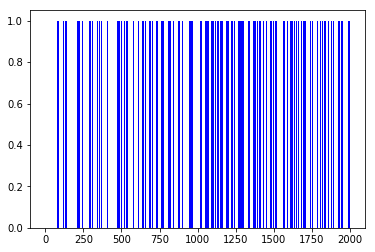

In [5]:
print('Success rate : ' + str(sum(rList)/num_episodes))
plt.bar(range(len(rList)), rList, color = 'blue')
plt.show()
# 결과가 안좋은 것을 확인할 수 있다 이유는 수렴하지 않기 때문에